<p>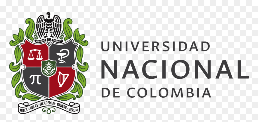</p>

<p style="text-align: center;"><br></p>
<p style="text-align: center;"><br></p>
<p style="text-align: center;"><strong><span style="font-size: 48px; color: rgb(184, 49, 47);">Proyecto Aplicado</span></strong></p>
<p style="text-align: center;"><br></p>
<p style="text-align: center;"><strong><span style='font-size: 30px; color: rgb(0, 0, 0); font-family: "Times New Roman", Times, serif;'>Reconocimiento de aves silvestres en Colombia.</span></strong><span style="font-size: 30px;"><br></span></p>
<p style="text-align: center;"><strong><span style="font-size: 30px; color: rgb(0, 0, 0);">T&eacute;cnicas de Inteligencia Artificial.</span></strong></p>
<p style="text-align: center;"><strong><span style="font-size: 30px; color: rgb(0, 0, 0);">2023-I</span></strong></p>
<p><span style="font-size: 20px;"><br></span></p>
<p style="text-align: center;"><span style="font-size: 20px;">Presentado por:</span></p>
<p style="text-align: center;"><br></p>
<p style="text-align: center;"><strong>Juli&aacute;n Felipe Medina Veira.</strong></p>
<p style="text-align: center;"><strong>Santiago Andres Gomez Pe&ntilde;a.</strong></p>
<p style="text-align: center;"><strong>Santiago D&acute;Leon Sanchez.</strong></p>

<p style="text-align: justify;"><br></p>
<p style="text-align: justify;"><strong><span style="font-size: 20px;">Introducci&oacute;n:</span></strong>&nbsp;</p>
<p style="text-align: justify;">En este notebook podr&aacute; encontrar a detalle la parte t&eacute;cnica del proyecto aplicado, descrito y profundizado en el informe adjunto a este. El fin de este modelo es categorizar por especie la imagen de entrada en un rango previamente establecido. El objetivo en este avance es:</p>
<ul>
    <li style="text-align: justify;">Importar los datos a trabajar (Im&aacute;genes).</li>
    <li style="text-align: justify;">Obtener los histogramas de una muestra.</li>
    <li style="text-align: justify;">Ecualizar las im&aacute;genes para probar el funcionamiento de los filtros.</li>
    <li style="text-align: justify;">Aplicar conceptos de morfolog&iacute;a.</li>
</ul>

Por lo tanto, procedemos a importar los datos en una lista:

In [ ]:
import cv2
import os #os.listdir para guardar una carpeta
import skimage.morphology as morph
import numpy as np
import matplotlib.pyplot as plt #Graficar
from scipy import ndimage  # Robert Cruzado

def imprimir(lista,n_filas,n_columnas):
    fig, axs = plt.subplots(n_filas, n_columnas, figsize=(10, 10))    
    
    for i in range(n_columnas*n_filas):
        fila = i // n_columnas
        columna = i % n_columnas
        axs[fila, columna].imshow(lista[i], cmap='gray')
        axs[fila, columna].axis('off')
        axs[fila, columna].set_title(f'Imagen {i+1}')
    


img1 = cv2.imread('./Especies/4. El corocoro rojo (Eudocimus ruber)/Corocoro (1).jpg',0)

# Tamaño de las imágenes redimensionadas
tamaño = (480, 480)

# Ruta a la carpeta de imágenes
ruta_carpeta = './Especies/4. El corocoro rojo (Eudocimus ruber)'

# Obtener una lista de los archivos en la carpeta
archivos = os.listdir('./Especies/4. El corocoro rojo (Eudocimus ruber)')

# Inicializar una lista vacía para las imágenes
imagenes = []

# Leer cada imagen y agregarla a la lista de imágenes
for archivo in archivos:
    ruta_imagen = os.path.join(ruta_carpeta, archivo)  #Asigna la dirección de imagen por imagen
    imagen = cv2.imread(ruta_imagen)                 #Lee la imagen
    imagen_redimensionada = cv2.resize(imagen, tamaño)   #Cambiar tamaño para facilitar el trabajo y el uso de Numpy
    imagen_bgr = cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2RGB)  #Cambiar BGR a RGB
    imagenes.append(imagen_bgr) #Se va añadiendo cada elemento a la lista imagenes
    
# Convertir la lista de imágenes en un arreglo de NumPy
arreglo_imagenes = np.array(imagenes)

arreglo_grises = []

for imagen in arreglo_imagenes:
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)
    arreglo_grises.append(imagen_gris)

# Convertimos el arreglo de imágenes en escala de grises a un arreglo de Numpy
arreglo_grises = np.array(arreglo_grises)

Observar que tanto parecido existe entre los histogramas

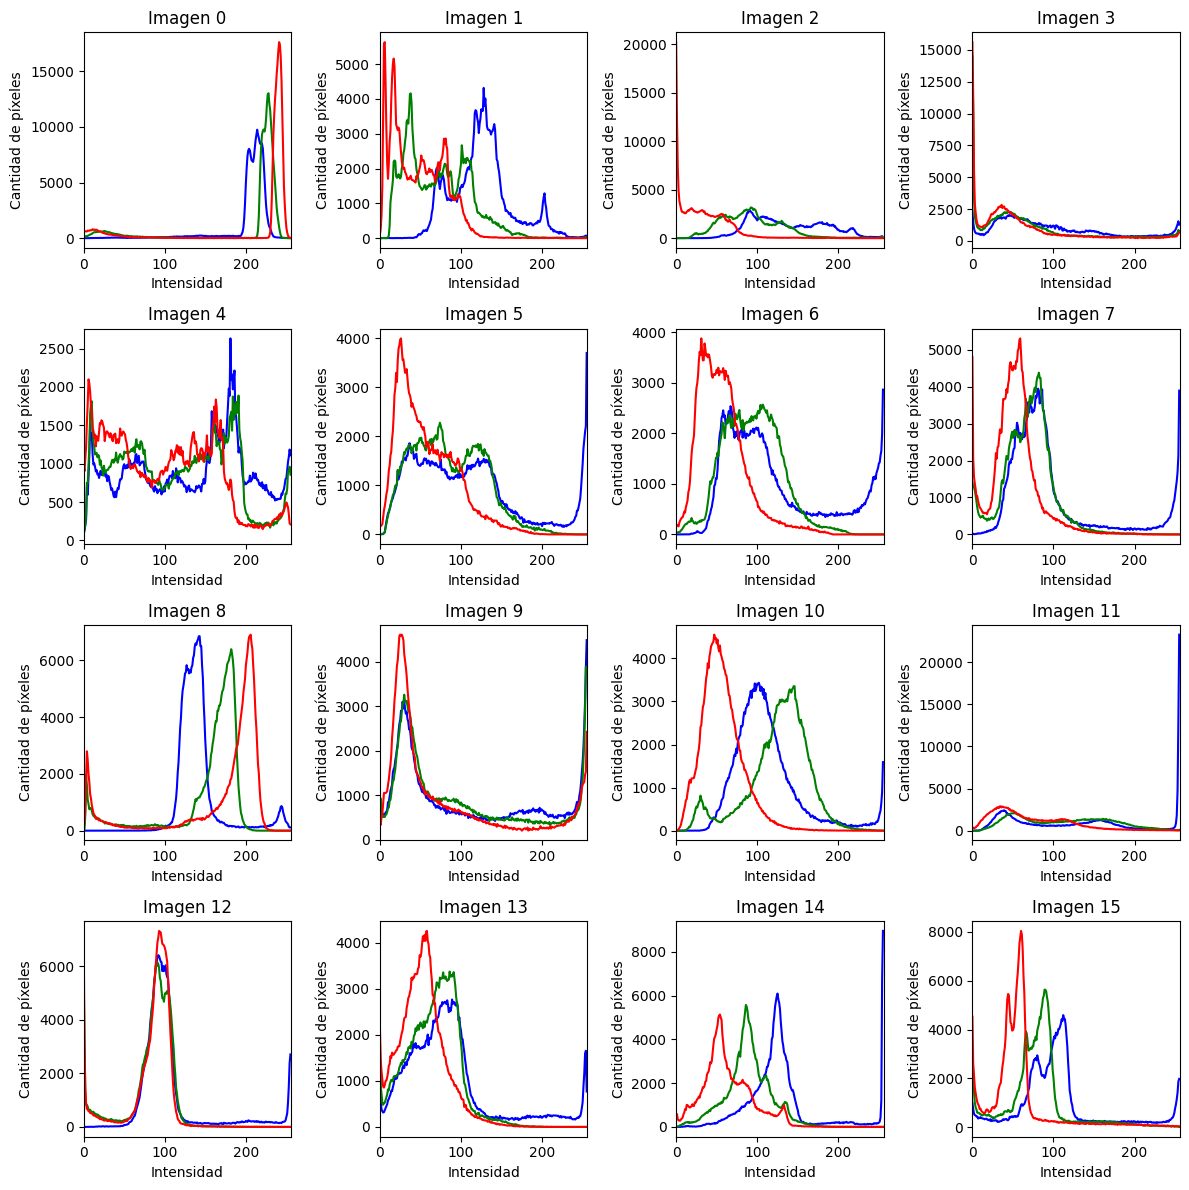

In [ ]:
# Definir los canales de color
colores = ('b', 'g', 'r')

# Definir el número de filas y columnas
n_filas = 4
n_columnas = 4

# Crear la figura y los subplots
fig, axs = plt.subplots(n_filas, n_columnas, figsize=(12, 12))

histogramas = []

# Iterar a través de las imágenes
for i, imagen in enumerate(arreglo_imagenes):
    # Calcular los histogramas RGB
    for i, color in enumerate(colores):
        hist = cv2.calcHist([imagen], [i], None, [256], [0, 256])
        histogramas.append(hist)
        

# Graficar los histogramas
for h in range(n_filas * n_columnas):
    fila = h // n_columnas
    columna = h % n_columnas
    for i, color in enumerate(colores):
        axs[fila, columna].plot(histogramas[(h*3)+i], color=color)
        axs[fila, columna].set_xlim([0, 256])
    axs[fila, columna].set_title('Imagen {}'.format(h))
    axs[fila, columna].set_xlabel('Intensidad')
    axs[fila, columna].set_ylabel('Cantidad de píxeles')

# Ajustar la distancia entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Se realiza la ecualizacion con el fin de probar si mejora el funcionamiento de los filtros

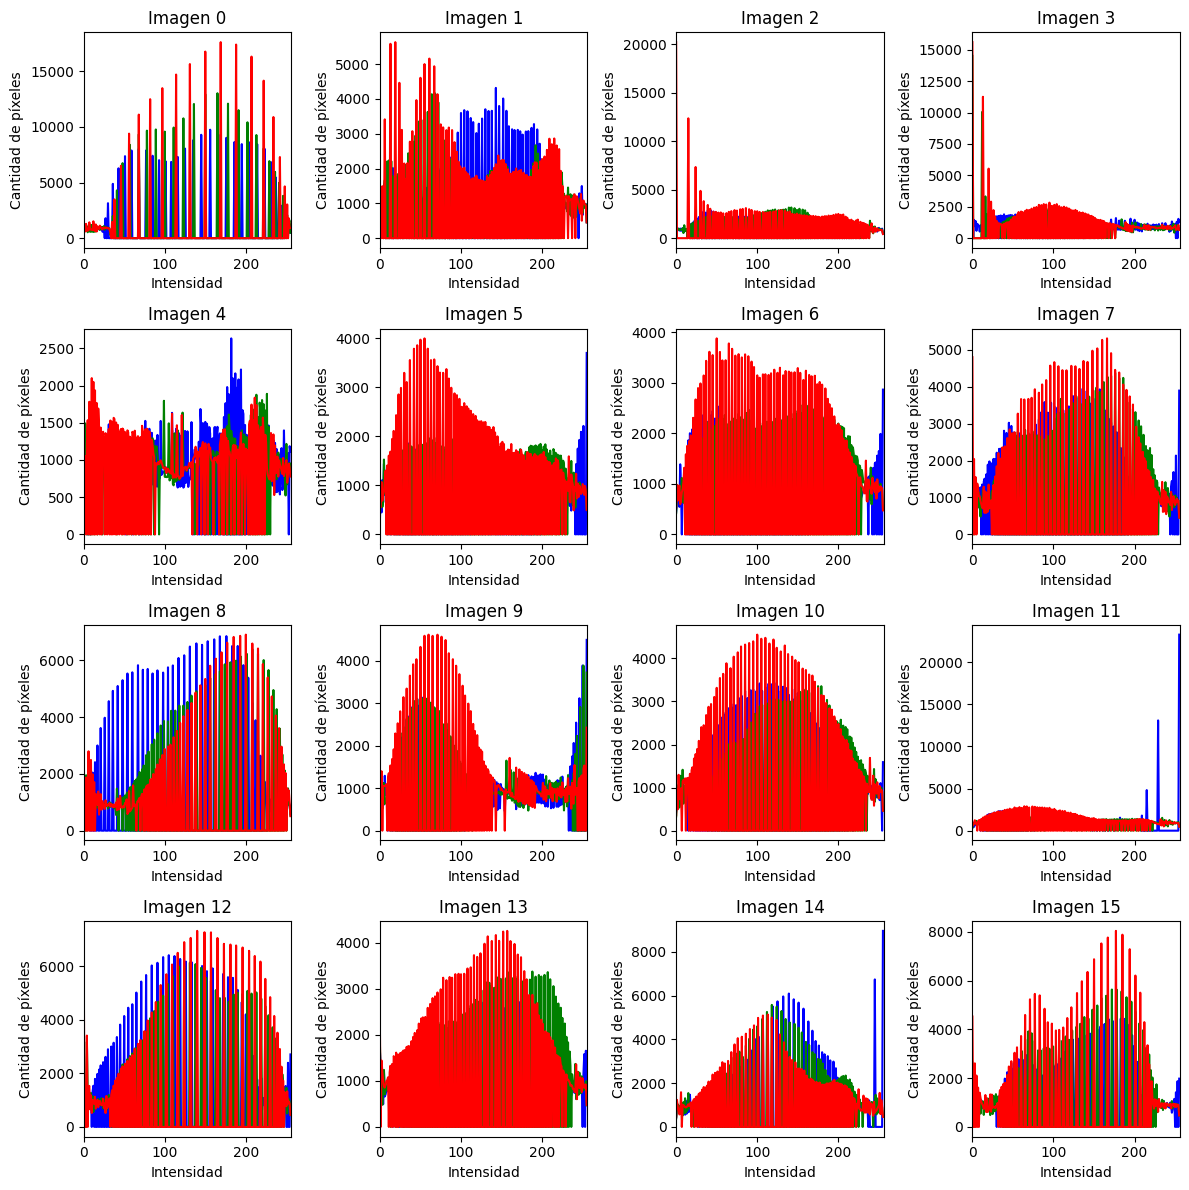

In [ ]:
# Definir los canales de color
colores = ('b', 'g', 'r')

# Definir el número de filas y columnas
n_filas = 4
n_columnas = 4

# Crear la figura y los subplots
fig, axs = plt.subplots(n_filas, n_columnas, figsize=(12, 12))

histogramas_eq = []

# recorrer lista y aplicar ecualización de histograma en cada canal
arreglo_eq = []
for imagen in arreglo_imagenes:
    # separar en canales RGB
    b, g, r = cv2.split(imagen)
    
    # aplicar ecualización de histograma en cada canal
    b_eq = cv2.equalizeHist(b)
    g_eq = cv2.equalizeHist(g)
    r_eq = cv2.equalizeHist(r)
    
    # unir canales ecualizados
    imagen_eq = cv2.merge((b_eq, g_eq, r_eq))
    
    # agregar imagen ecualizada a la lista
    arreglo_eq.append(imagen_eq)
    
# Iterar a través de las imágenes
for i, imagen in enumerate(arreglo_eq):
    # Calcular los histogramas RGB
    for i, color in enumerate(colores):
        hist = cv2.calcHist([imagen], [i], None, [256], [0, 256])
        histogramas_eq.append(hist)
        

# Graficar los histogramas
for h in range(n_filas * n_columnas):
    fila = h // n_columnas
    columna = h % n_columnas
    for i, color in enumerate(colores):
        axs[fila, columna].plot(histogramas_eq[(h*3)+i], color=color)
        axs[fila, columna].set_xlim([0, 256])
    axs[fila, columna].set_title('Imagen {}'.format(h))
    axs[fila, columna].set_xlabel('Intensidad')
    axs[fila, columna].set_ylabel('Cantidad de píxeles')

# Ajustar la distancia entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()  

Se observa que los tres colores suelen tener el mismo valores similares en terminos de intensidad y pixeles, pero esto se puede ver fuertemente influido por los detalles del fondo, por lo que resulta necesario considerar como tomar datos del ave mediante el establecimiento de una frontera que represente los pixeles del ave, por lo que se implementa el filtro de canny, tambien se añaden filtros de suavizado pero no se observa mejoras.

In [ ]:
arreglo_bordes = []

for img in arreglo_grises:
    img_media = cv2.blur(img, (5,5))
    edges = cv2.Canny(img_media, 50, 200) #Umbrales
    arreglo_bordes.append(edges)

for i in range(len(arreglo_imagenes)):
    
    # obtener la imagen original en color
    img = arreglo_imagenes[i]
    
    # obtener los bordes Canny
    edges = arreglo_bordes[i]
    
    # crear la máscara de las fronteras
    mask = np.zeros_like(arreglo_grises[i])
    mask[edges != 0] = 255
    
    # redimensionar la máscara a la misma forma que la imagen
    mask = cv2.resize(mask, (img.shape[1], img.shape[0]))
    
    # modificar los colores de las fronteras
    img[mask != 0] = [0, 0, 0]  # cambiar a negro
    
imprimir(arreglo_bordes,3,4)

IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

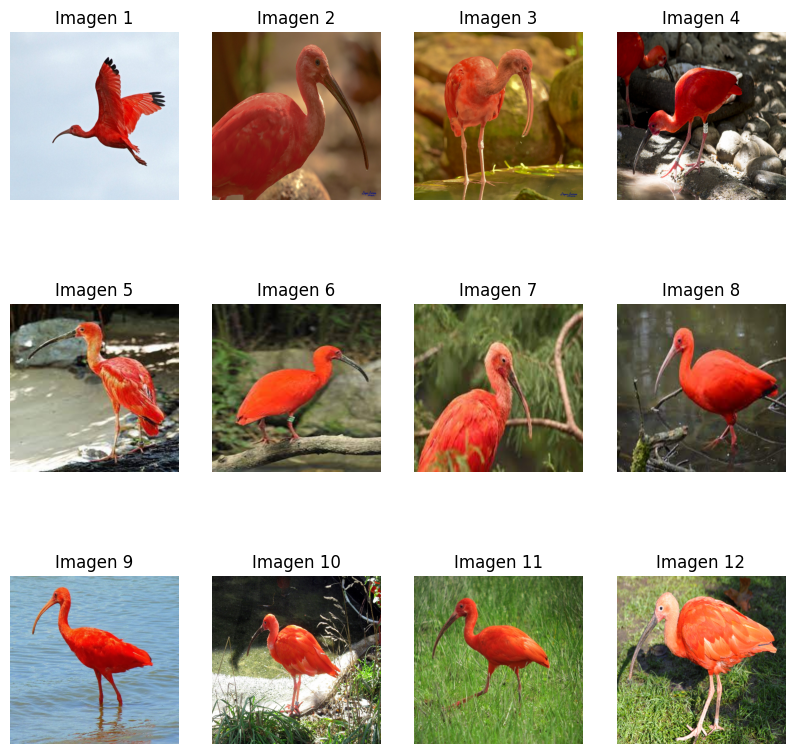

In [ ]:
imprimir(arreglo_imagenes,3,4)

In [1]:
arreglo_bordes_eq = []

arreglo_grises_eq = []

for imagen in arreglo_eq:
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)
    arreglo_grises_eq.append(imagen_gris)

# Convertimos el arreglo de imágenes en escala de grises a un arreglo de Numpy
arreglo_grises_eq = np.array(arreglo_grises)

for img in arreglo_grises_eq:
    img_media = cv2.blur(img, (5,5))
    edges = cv2.Canny(img_media, 50, 200) #Umbrales
    arreglo_bordes_eq.append(edges)
    
for i in range(len(arreglo_eq)):
    
    # obtener la imagen original en color
    img = arreglo_eq[i]
    
    # obtener los bordes Canny
    edges = arreglo_bordes_eq[i]
    
    # crear la máscara de las fronteras
    mask = np.zeros_like(arreglo_grises_eq[i])
    mask[edges != 0] = 255
    
    # redimensionar la máscara a la misma forma que la imagen
    mask = cv2.resize(mask, (img.shape[1], img.shape[0]))
    
    # modificar los colores de las fronteras
    img[mask != 0] = [0, 0, 0]  # cambiar a negro
    
imprimir(arreglo_bordes_eq,3,4)

NameError: ignored

Se observa que la ecualizacion mejora la fronteras en las imagenes utilizadas

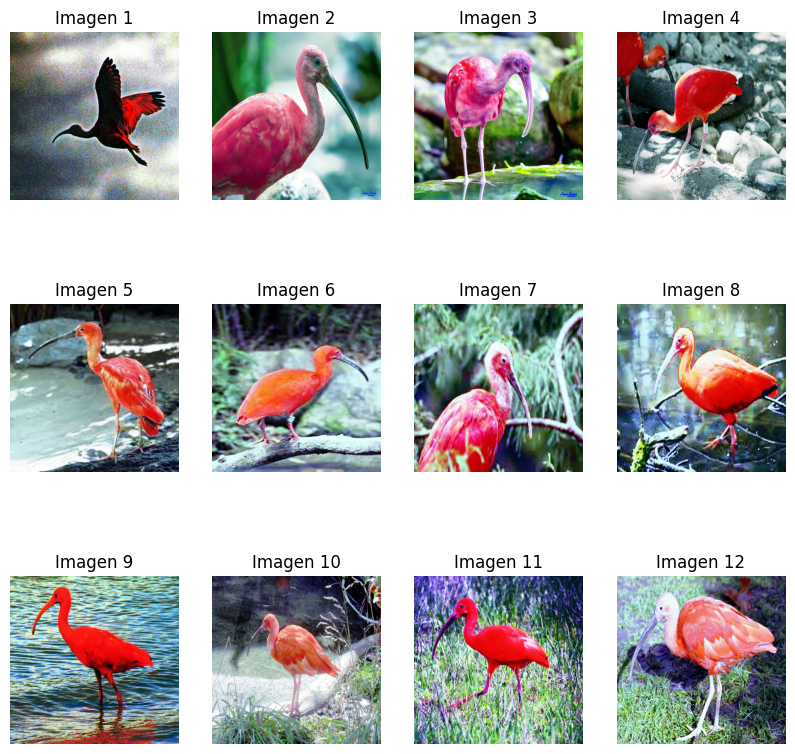

In [ ]:
imprimir(arreglo_eq,3,4)

Se aplica los conceptos de morfologia para observar si se puede mejorar la construccion de fronteras

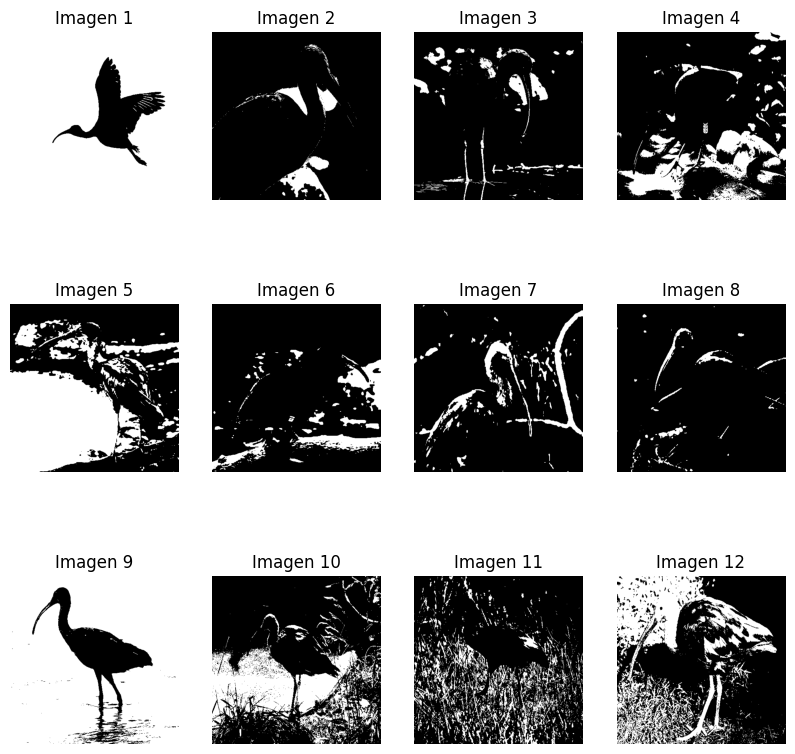

In [ ]:
umbral = 128
arreglo_umbralizado = []

for img in arreglo_imagenes:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, img_umbralizada = cv2.threshold(img_gray, umbral, 255, cv2.THRESH_BINARY)
    arreglo_umbralizado.append(img_umbralizada)

imprimir(arreglo_umbralizado,3,4)
    
plt.show()

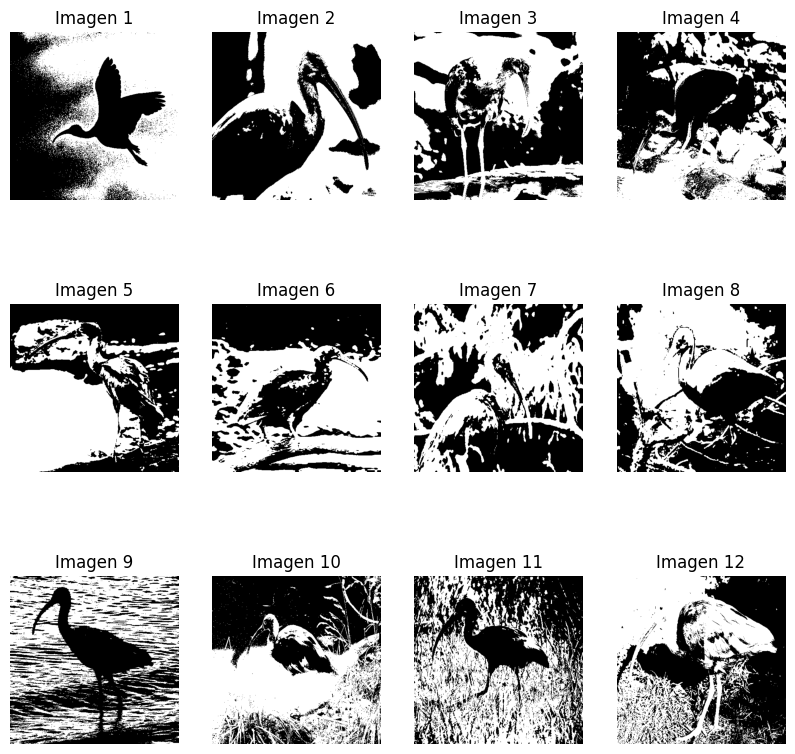

In [ ]:
umbral = 127
arreglo_umbralizado_eq = []

for img in arreglo_eq:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, img_umbralizada = cv2.threshold(img_gray, umbral, 255, cv2.THRESH_BINARY)
    arreglo_umbralizado_eq.append(img_umbralizada)

imprimir(arreglo_umbralizado_eq,3,4)

Se observa claramente como la ecualizacion mejora los resultados obtenidos en la umbralizacion al observar las imagenes con mejor calidad para un codigo general.

In [ ]:
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25)) #CROSS, ELLIPSE, RECT
arreglo_dil = [] #Mejora la conductividad de las regiones
arreglo_ero = []
arreglo_bound = [] #Extrae la frontera
arreglo_cl = []
arreglo_op = []
arreglo_thin = []
arreglo_skel = []

for img in arreglo_umbralizado_eq:  #Se puede usar grises (grises, grises_eq)
    dil = cv2.dilate(img, se) #Dilatacion
    ero = cv2.erode(img, se) #Erosion
    bound = img - ero #Frontera
    cl = cv2.morphologyEx(img, cv2.MORPH_CLOSE, se)
    op = cv2.morphologyEx(img, cv2.MORPH_OPEN, se)
    arreglo_dil.append(dil)
    arreglo_ero.append(ero)
    arreglo_bound.append(bound)
    arreglo_cl.append(cl)
    arreglo_op.append(op)

imprimir(arreglo_bound,3,4)

Se observa que al usar un kernel de mayor tamaño se obtiene un mayor detalle de la frontera, pero genera mucha perdida de informacion para las otras operaciones morfologicas, aunque no se les ha encontrado un uso claro de momento.

In [ ]:
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25)) #CROSS, ELLIPSE, RECT

arreglo_thin = []
arreglo_skel = []

#Se añadio el codigo por aparte por la carga computacional

for img in arreglo_umbralizado_eq:  #Se puede usar grises (grises, grises_eq)
    dil = cv2.dilate(img, se) #Dilatacion
    thin = morph.thin(dil,75)
    skel = morph.skeletonize(dil//255)  #Umbral
    arreglo_thin.append(thin)
    arreglo_skel.append(skel)
    
imprimir(arreglo_skel,3,4)

Se observa que los operadores morfologicos de adelgazamiento no funcionan